# Calculating areacella for CESM LME: 
  
Katie Brennan  
November 2021

In [1]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt

In [2]:
Re_e = 6378.137*1000 # meters
Re_p = 6356.752*1000 #meters

In [3]:
Re_e

6378137.0

In [3]:
data_dir = '/home/disk/chaos/mkb22/Documents/SeaIceData/LME/LIMs/'
data_name = 'tas_sfc_Amon_CESM_LMEallforc_085101-200512.nc'

data = xr.open_dataset(data_dir+data_name)

In [4]:
data

<xarray.Dataset>
Dimensions:    (lat: 96, lon: 144, member: 12, nbnd: 2, time: 13860)
Coordinates:
  * time       (time) object 0851-01-17 00:00:00 ... 2005-12-17 00:00:00
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * member     (member) int32 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nbnd
Data variables:
    time_bnds  (time, nbnd) object ...
    tas        (member, time, lat, lon) float32 ...
Attributes:
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b.e11.BLMTRC5CN.f19_g16.002
    title:                     UNSET
    logname:                   mai
    host:                      ys0137
    Version:                   $Name$
    revision_Id:               $Id$
    initial_file:              b.e11.B1850C5CN.f19_g16.0850cntl.001.cam.i.085...
    topography_file:           /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/...
    nco_openmp_thread_number:  1
    history:                   Fri Oct  2 15:20:52 2020: ncecat -u member /ho...
    NCO:                       "4.6.3"

In [10]:
lats = data.lat.values
lons = data.lon.values

## Method 1: 

Calculate area of grid cell at the equator and then use cos(lat) to estimate the rest. 

In [94]:
Aearth = 4*np.pi*Re_e**2

Cd = lons.shape[0]*np.sum(np.cos(np.deg2rad(lats)))

C = Aearth/Cd  # equator grid cell area

Agrid = C*np.cos(np.deg2rad(lats))[:,np.newaxis]*np.ones((lats.shape[0],lons.shape[0]))

Agrid_member = Agrid[np.newaxis,:,:]*np.ones((12,lats.shape[0],lons.shape[0]))

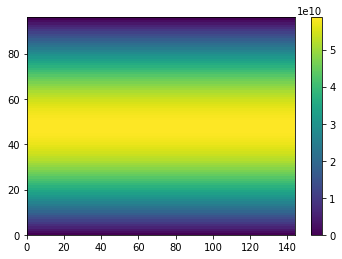

In [95]:
plt.pcolormesh(Agrid)
plt.colorbar()

In [113]:
da = xr.DataArray(data=Agrid_member,
                  dims=["member","nlat","nlon"],
                      coords=dict(lon=(["nlon"], lons),
                                  lat=(["nlat"], lats),
                                  member=(["member"],np.arange(0,12,1))),
                      attrs=dict(description="estimated grid cell area",
                                 units="m^2"),
                 name='areacella')

In [118]:
ds = xr.Dataset({"areacella": da})

In [120]:
ds.to_netcdf(data_dir+'areacella_CESM_LME_global.nc')

## Method 2: 

Following https://www.pmel.noaa.gov/maillists/tmap/ferret_users/fu_2004/msg00023.html
  
However ends up with one less latitude value than original because starts and ends at 90/-90, but used difference to calculate area of each latitude band. 

In [59]:
Area_per_lat = 2*np.pi*Re_e**2*(1-np.sin(np.deg2rad(lats)))
Area_lat_bands = Area_per_lat[:-1]-Area_per_lat[1:]

Area_grid_cell = Area_lat_bands[:,np.newaxis]*np.ones((95,144))*(2.5/360)

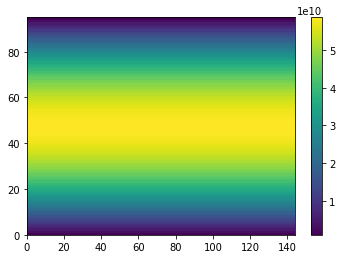

In [63]:
plt.pcolormesh(Area_grid_cell)
plt.colorbar()

# For Large Ensemble: 

In [4]:
data_dir = '/home/disk/chaos/mkb22/Documents/SeaIceData/CESM_LE/'
data_name = 'tas_CESM_LE_002_200601-210012.nc'

data = xr.open_dataset(data_dir+data_name)

In [5]:
lats = data.lat.values
lons = data.lon.values

In [6]:
Aearth = 4*np.pi*Re_e**2

Cd = lons.shape[0]*np.sum(np.cos(np.deg2rad(lats)))

C = Aearth/Cd  # equator grid cell area

Agrid = C*np.cos(np.deg2rad(lats))[:,np.newaxis]*np.ones((lats.shape[0],lons.shape[0]))

Agrid_member = Agrid[np.newaxis,:,:]*np.ones((12,lats.shape[0],lons.shape[0]))

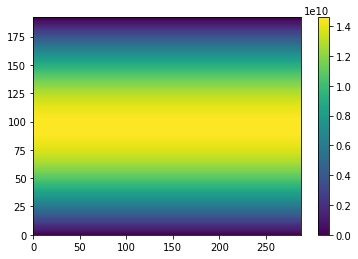

In [7]:
plt.pcolormesh(Agrid)
plt.colorbar()

In [8]:
da = xr.DataArray(data=Agrid_member,
                  dims=["member","nlat","nlon"],
                      coords=dict(lon=(["nlon"], lons),
                                  lat=(["nlat"], lats),
                                  member=(["member"],np.arange(0,12,1))),
                      attrs=dict(description="estimated grid cell area",
                                 units="m^2"),
                 name='areacella')

In [9]:
ds = xr.Dataset({"areacella": da})

In [10]:
ds.to_netcdf(data_dir+'areacella_CESM_LE_global.nc')